In [1]:
#import packages we need 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib.dates as mdate
import requests
import warnings
warnings.filterwarnings('ignore')

## Know your Penguins

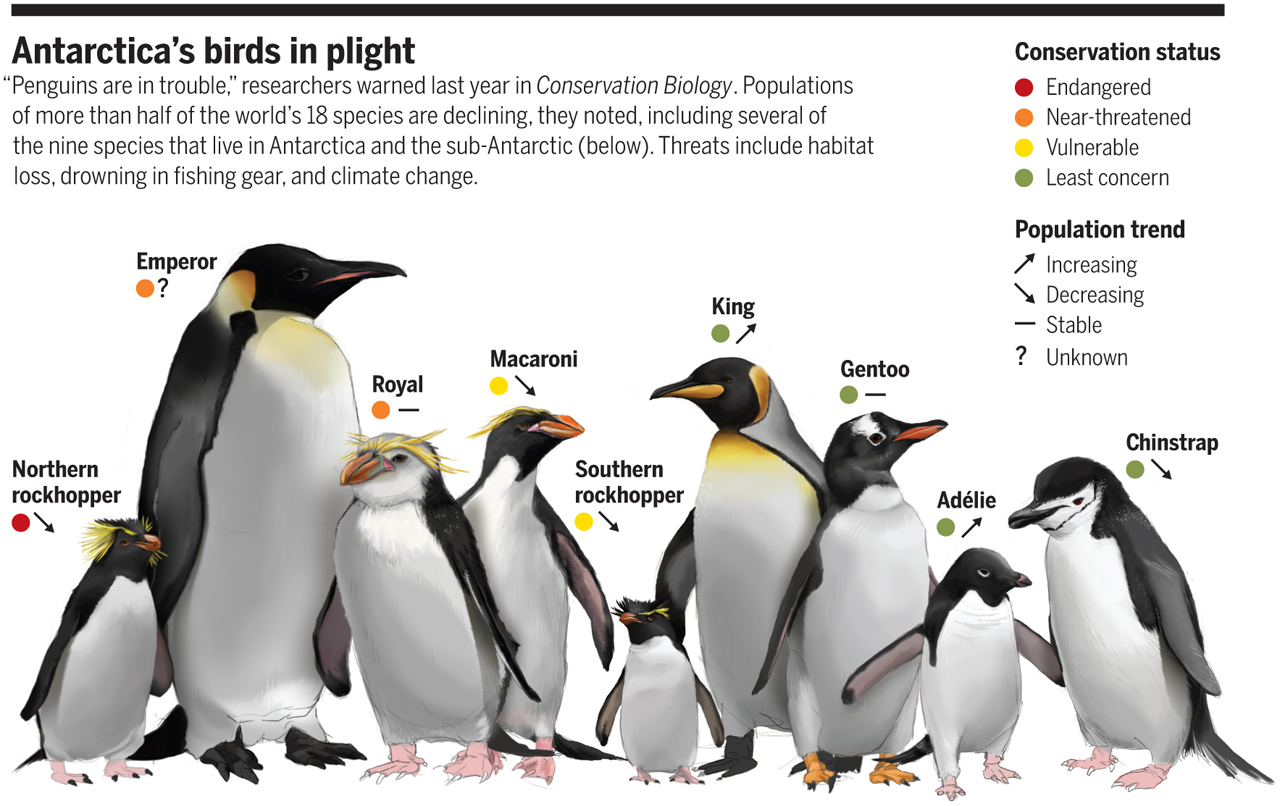

In [2]:
from IPython.display import Image

data_url='https://people.rit.edu/nxmsma/courses/webM689S23/data/EWeX_nwXYA0mcUM.jpg'
r = requests.get(data_url)
open('EWeX_nwXYA0mcUM.jpg', 'wb').write(r.content)


Image(filename='EWeX_nwXYA0mcUM.jpg',width=1250) 

In [3]:
!pip install palmerpenguins

In [4]:
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [5]:
print('Name of Penguin Species:', penguins['species'].unique().tolist())
print('Name of Islands:',penguins['island'].unique().tolist())

Name of Penguin Species: ['Adelie', 'Gentoo', 'Chinstrap']
Name of Islands: ['Torgersen', 'Biscoe', 'Dream']


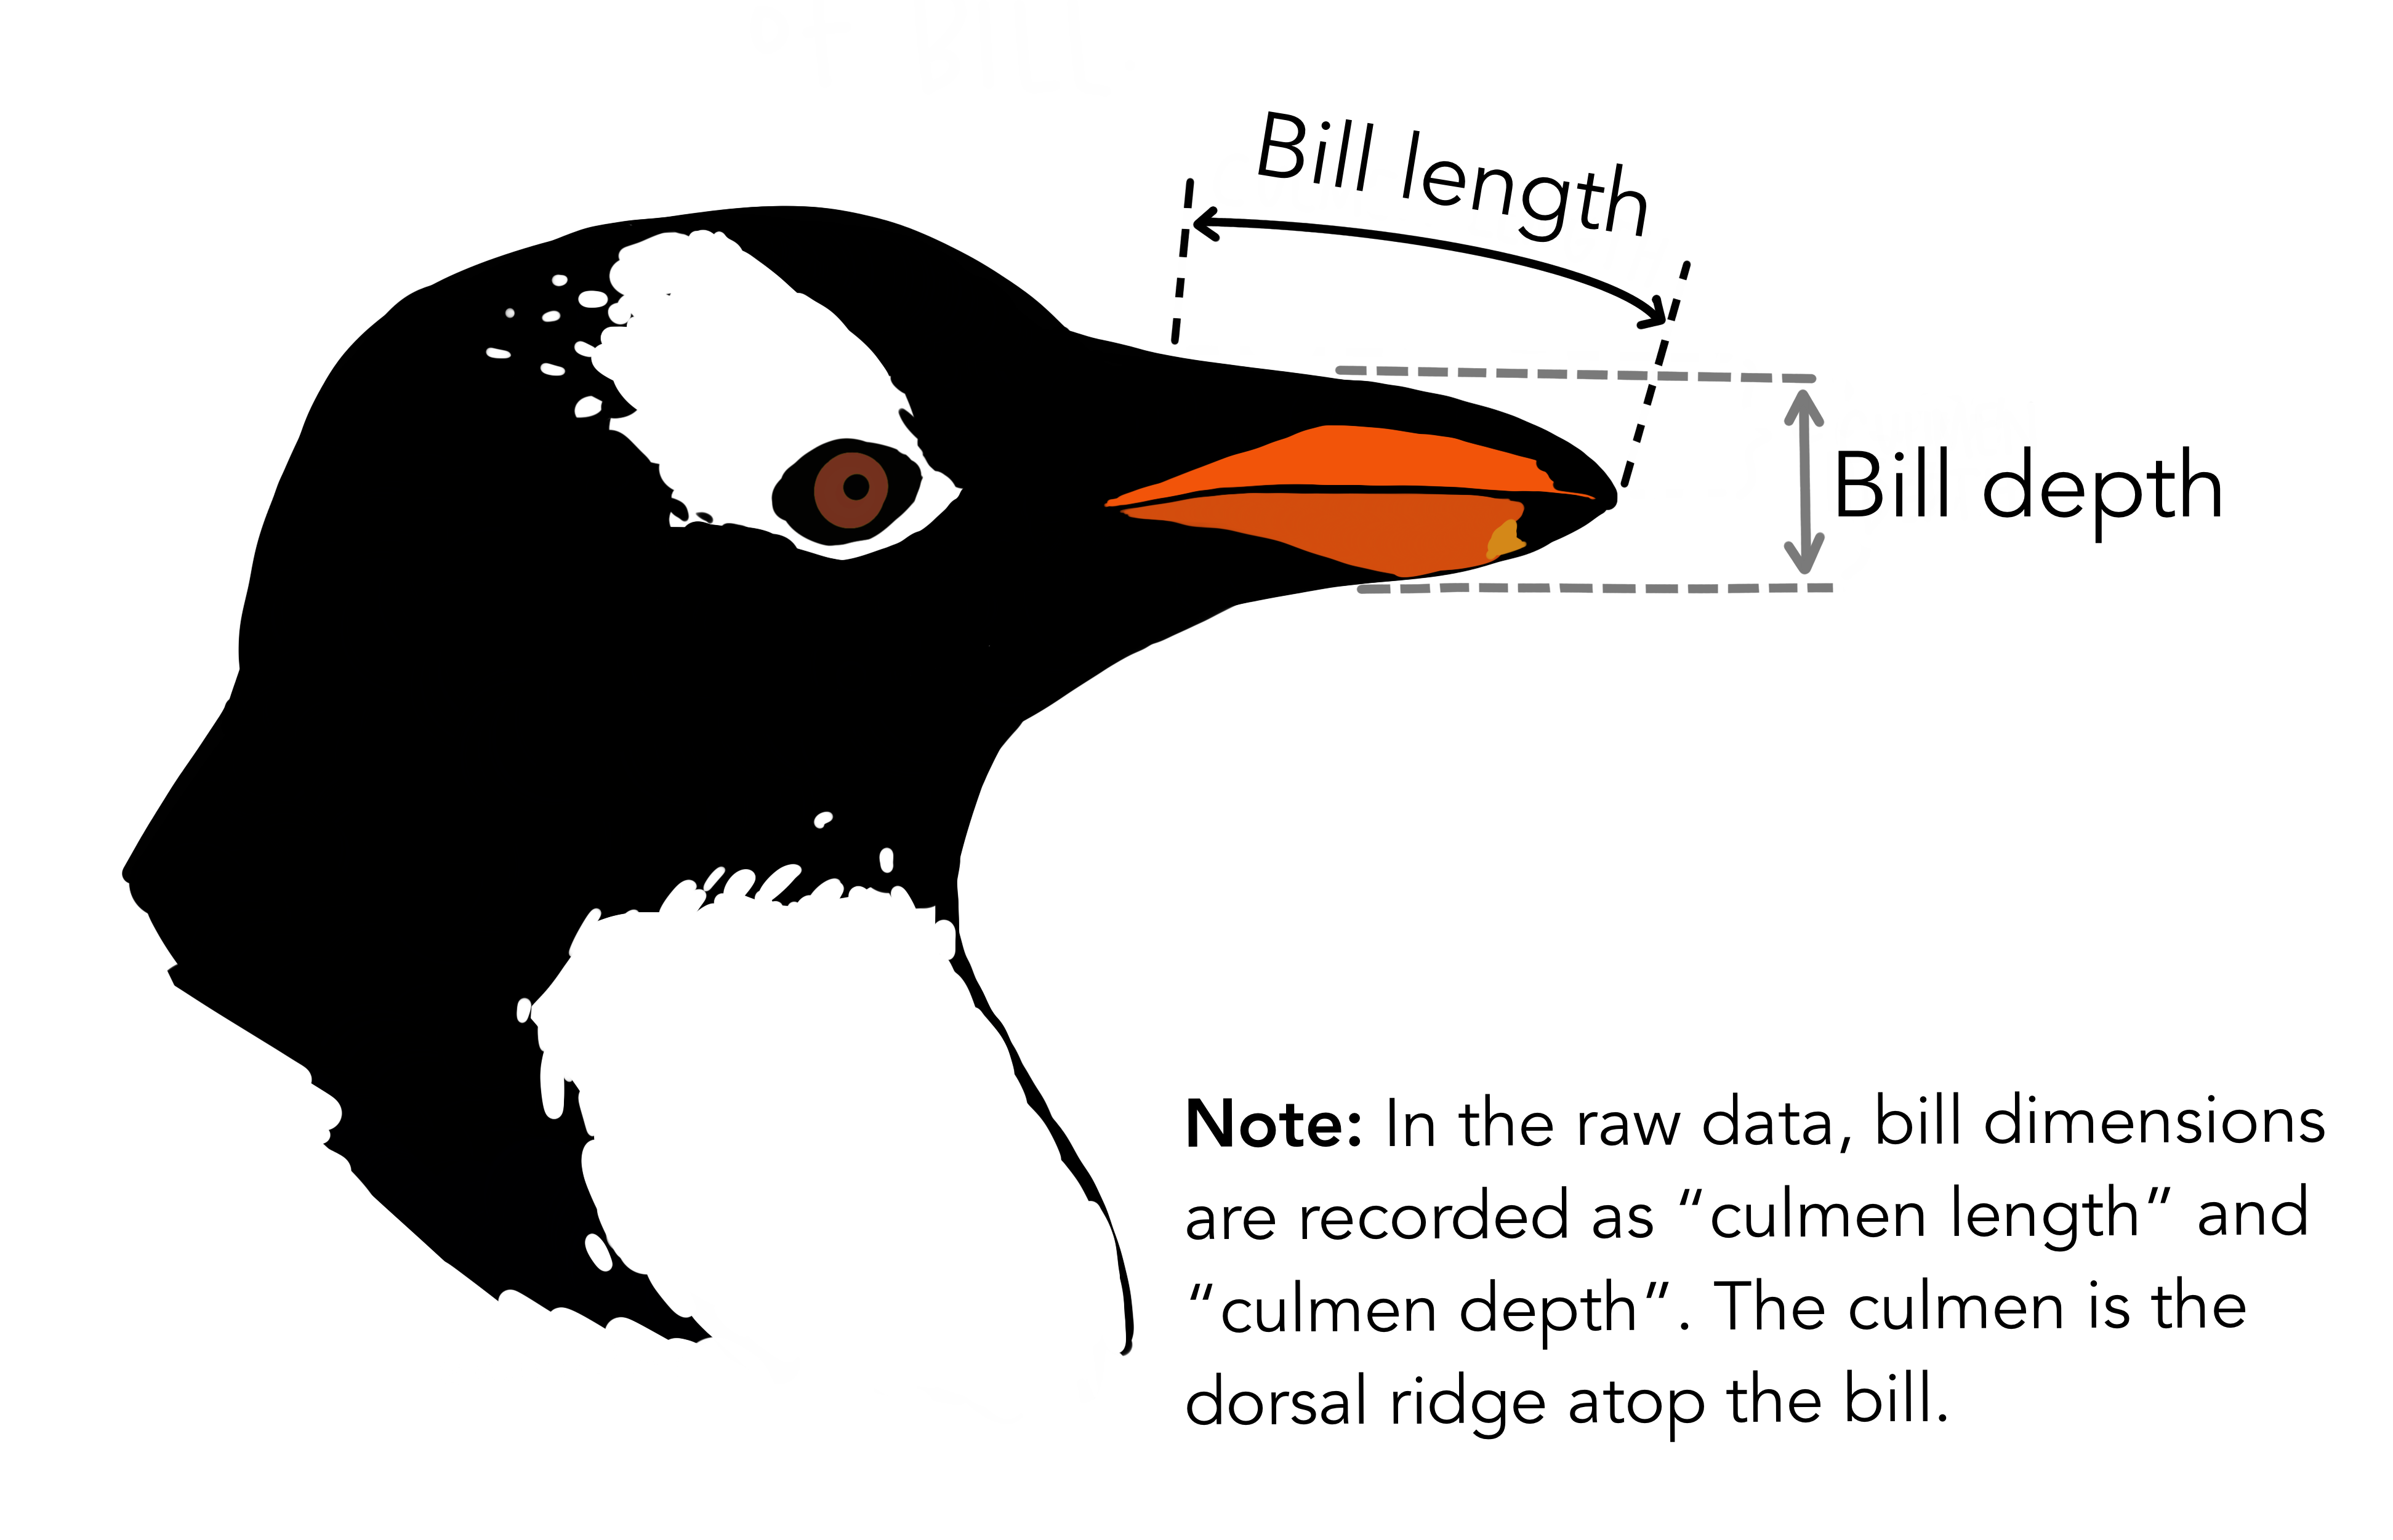

In [6]:
data_url='https://people.rit.edu/nxmsma/courses/webM689S23/data/culmen_depth.png'
r = requests.get(data_url)
open('culmen_depth.png', 'wb').write(r.content)

Image(filename='culmen_depth.png',width=750)

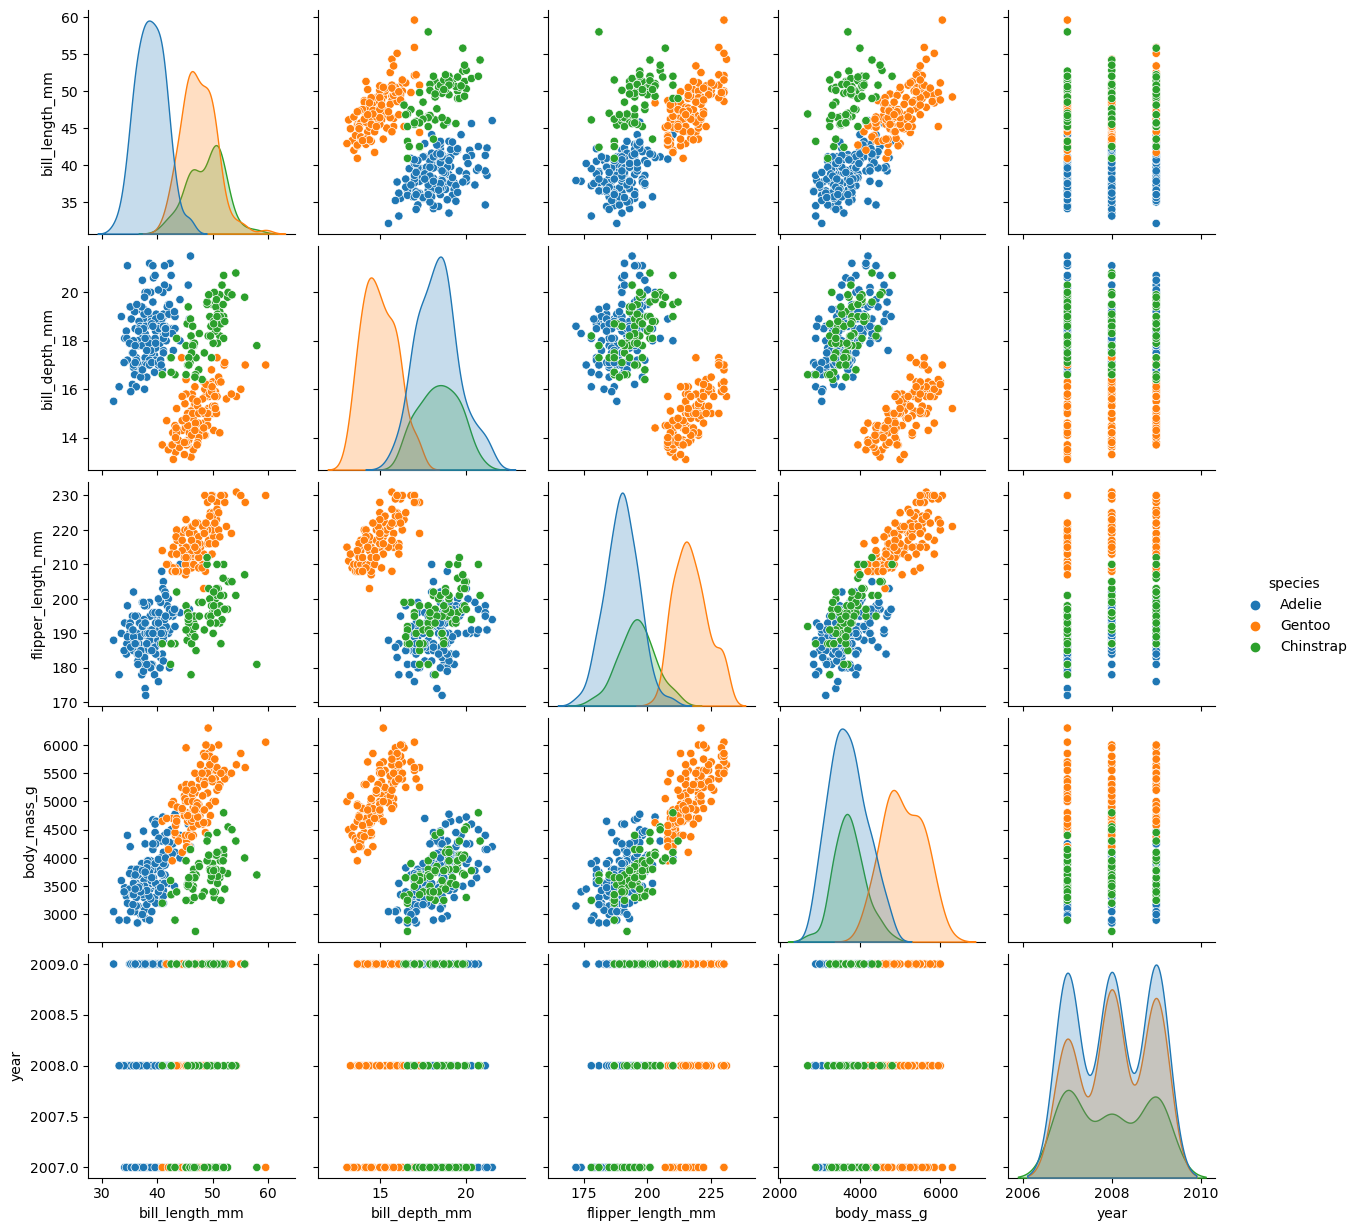

In [7]:
# Plot the data
import seaborn as sns
sns.pairplot(penguins, hue="species")

In [8]:
# select the numerical data and drop NaNs
penguins_1= penguins.dropna()
penguins_1.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [9]:
# select the numerical data and drop NaNs
penguins_1= penguins.dropna()
penguins_1.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

In [11]:
#Choose the columns with numerical values
penguins_2=penguins_1[['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']]

In [12]:
pipeline = make_pipeline(StandardScaler(),PCA(n_components=4))
penguins_pca= pipeline.fit_transform(penguins_2)

In [13]:
pipeline.named_steps['standardscaler'].fit_transform(penguins_2)

array([[-0.89604189,  0.7807321 , -1.42675157, -0.56847478],
       [-0.82278787,  0.11958397, -1.06947358, -0.50628618],
       [-0.67627982,  0.42472926, -0.42637319, -1.1903608 ],
       ...,
       [ 1.02687621,  0.52644436, -0.56928439, -0.53738048],
       [ 1.24663828,  0.93330475,  0.64546078, -0.13315457],
       [ 1.13675725,  0.7807321 , -0.2120064 , -0.53738048]])

In [14]:
var_l=pipeline.named_steps['pca'].explained_variance_ratio_*100
var_l=var_l.tolist()

j=1; var0=0.0
for var in var_l:
  print('PC%i variance %3.2f' %(j,var)); j=j+1; var0+=var


print ('Total variance = %3.2f'%sum(var_l) ) 
print ('Variance of first two PCs = %3.2f'%(var_l[0]+var_l[1])) 

PC1 variance 68.63
PC2 variance 19.45
PC3 variance 9.22
PC4 variance 2.70
Total variance = 100.00
Variance of first two PCs = 88.09


In [16]:
penguins_1['PC1']=penguins_pca[:,0]
penguins_1['PC2']=penguins_pca[:,1]
penguins_1['PC3']=penguins_pca[:,2]
penguins_1['PC4']=penguins_pca[:,3]

penguins_1.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,PC1,PC2,PC3,PC4
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,-1.853593,0.032069,-0.234902,0.528397
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,-1.316254,-0.443527,-0.027470,0.401727
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,-1.376605,-0.161230,0.189689,-0.528662
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,-1.885288,-0.012351,-0.628873,-0.472893
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,-1.919981,0.817598,-0.701051,-0.196416


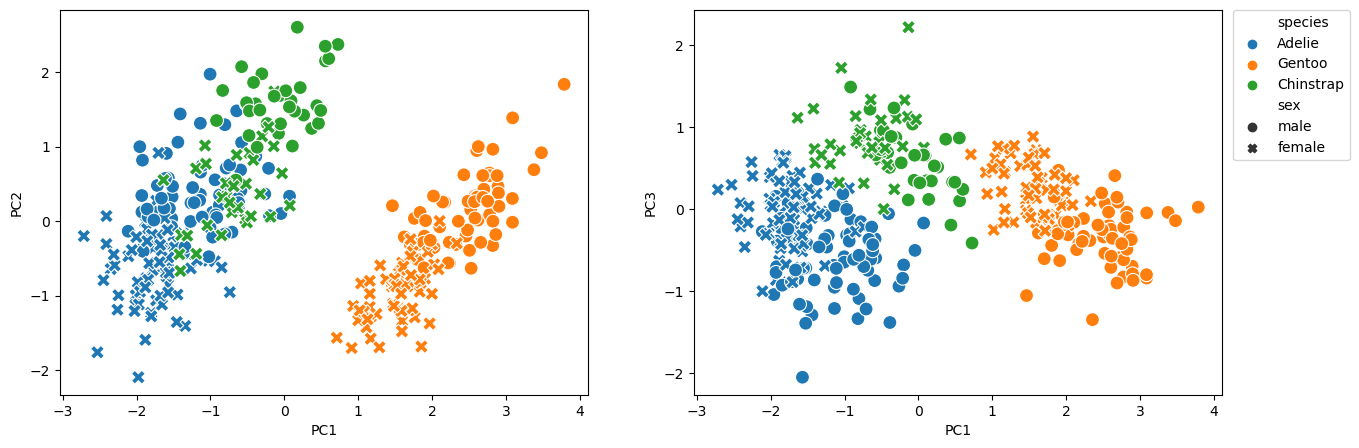

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
g=sns.scatterplot(x="PC1", y="PC2",data=penguins_1, hue="species",style="sex",s=100,legend=False)
plt.subplot(1,2,2)
g=sns.scatterplot(x="PC1", y="PC3",data=penguins_1, hue="species",style="sex",s=100)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

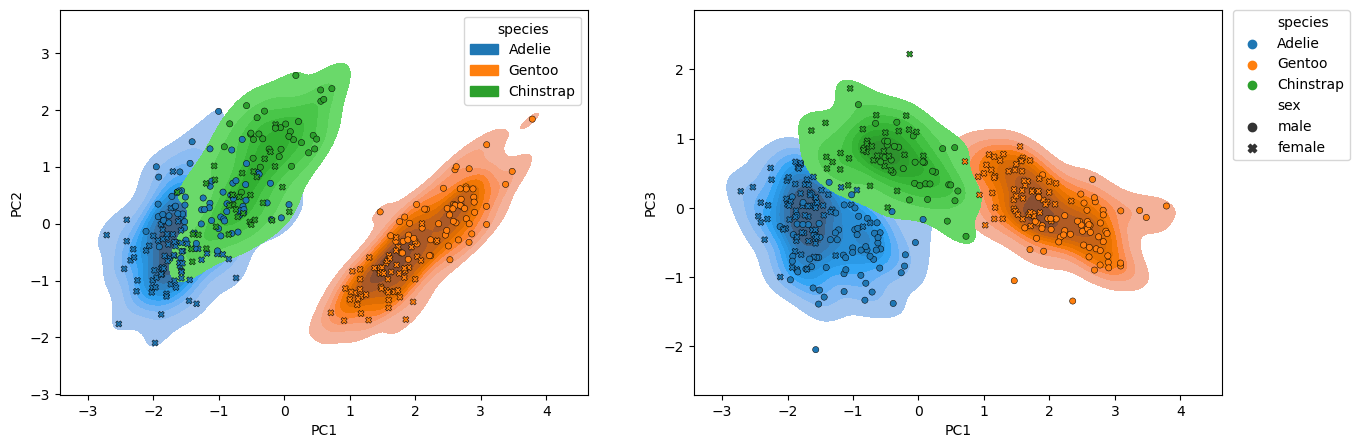

In [18]:
# Contour plots: Species 
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.kdeplot(x="PC1", y="PC2",data=penguins_1,hue="species",fill=True)
sns.scatterplot(x="PC1", y="PC2",data=penguins_1, hue="species",style="sex",s=20,legend=False,edgecolor='k')
plt.subplot(1,2,2)
sns.kdeplot(x="PC1", y="PC3",data=penguins_1,hue="species",fill=True)
sns.scatterplot(x="PC1", y="PC3",data=penguins_1, hue="species",style="sex",s=20,edgecolor='k')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

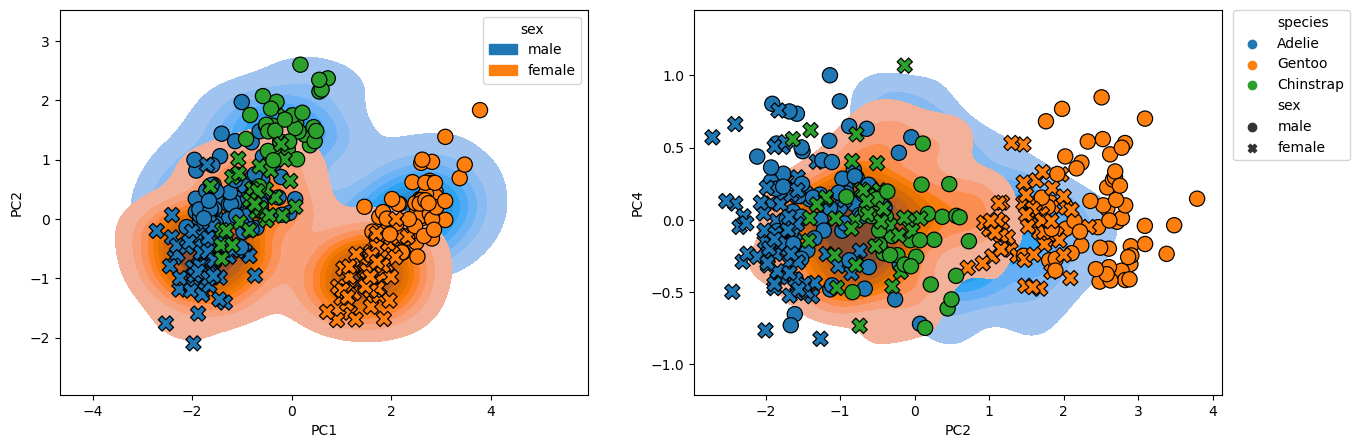

In [19]:
# Contour plots: Sex 



plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.kdeplot(x="PC1", y="PC2",data=penguins_1,hue="sex",fill=True)
sns.scatterplot(x="PC1", y="PC2",data=penguins_1, hue="species",style="sex",s=120,legend=False,edgecolor='k')
plt.subplot(1,2,2)
sns.kdeplot(x="PC2", y="PC4",data=penguins_1,hue="sex",fill=True)
sns.scatterplot(x="PC1", y="PC4",data=penguins_1, hue="species",style="sex",s=120,edgecolor='k')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [22]:
from pandas_profiling import ProfileReport

profile = ProfileReport(penguins_2)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]